# Gradient Descent from scratch with Python based on log loss function

<br>

This notebook will implement the Gradient Descent algorithm from scratch. The following implementation is based on the Log Loss function :

<br>

\begin{equation*}
Error(y,\hat{y}) = -y \log (\hat{y})-(1-y)\log(1-\hat{y})
\end{equation*}

### Imports


In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Data visualization helpers

In [101]:
# Plot features points with label separation by colors
def plot_points(X, y):
    label_dict = {0: 'blue', 1: 'red'}
    for i in range(0, len(X)):
        plt.scatter(X[i][0], X[i][1], color=label_dict[y[i]])

# Plot a decision boundary based on the line equation y = m*x + b
def plot_decision_boundary(m, b, color='g--'):
    # Set x and y scales limits
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    # Create an array of values to be used on the equation line
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

### Load dataset

In [58]:
# "header = None" does not include header on dataframe, generating
# numerical "names" for all columns
dataset = np.asarray(pd.read_csv('../dataset/random_dataset4', header=None))
X = dataset[:,:-1]
y = dataset[:,-1]

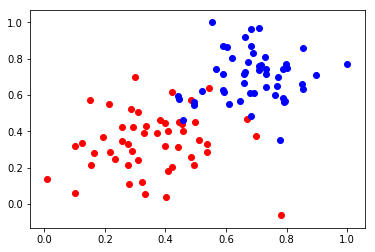

In [59]:
plot_points(X, y)
plt.show()

### Gradient Descent basic functions

For the Gradient Descent implementation, the following formulas are used 
:

<br>

- Sigmoid activation
<br>

\begin{equation*}
\sigma (x) = \frac{1}{1+e^{-x}}
\end{equation*}

<br>

- Prediction
\begin{equation*}
\hat{y} =\sigma(w_1x_1+w_2x_2+b)
\end{equation*}

<br>

- Log loss error function
\begin{equation*}
Error(y,\hat{y}) = -y \log (\hat{y})-(1-y)\log(1-\hat{y})
\end{equation*}

<br>

- Weights and bias update rules
\begin{equation*}
w_i\rightarrow w_i+\alpha(y-\hat{y})x_i
\end{equation*}
\begin{equation*}
b\rightarrow b+\alpha(y-\hat{y})
\end{equation*}


In [60]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b)

def log_loss_error(y, y_pred):
    return -y*np.log(y_pred) - (1 - y) * np.log(1-y_pred)

def update_weights(X, y, w, b, learning_rate):
    y_pred = predict(X, w, b)
    prediction_error = y - y_pred
    w += learning_rate * prediction_error * X
    b += learning_rate * prediction_error
    return w, b

### Training helpers

In [122]:
def train(features, targets, epochs, learning_rate):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    # Repeats the (prediction -> weights/bias update) process
    # following the specified epochs value.
    for e in range(epochs):
        # In every epoch, check the prediction for each one of the
        # samples from the dataset, performing then the weights and
        # bias update accordingly.
        for x, y in zip(features, targets):
            output = predict(x, weights, bias)
            error = log_loss_error(y, output)
            weights, bias = update_weights(x, y, weights, bias, learning_rate)
    
        # Calculate the model loss after each epoch iteraction.
        # The loss is calculated over th whole training dataset
        # at the same time.
        model_prediction = predict(features, weights, bias)
        model_loss = np.mean(log_loss_error(targets, model_prediction))
        errors.append(model_loss)
        
        # Print training results and boundaries generated
        # alongside this process
        if e % (epochs/10) == 0:
            print("\n========== Epoch", e,"==========")
            # Check if loss increased
            if last_loss and last_loss < model_loss:
                print("Train loss: ", model_loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", model_loss)
            last_loss = model_loss
            model_predictions_binary = model_prediction > 0.5
            accuracy = np.mean(model_predictions_binary == targets)
            print("Accuracy: ", accuracy)
            # Display boundaries generated durgin training
        if e % (epochs/100) == 0:
            plot_decision_boundary(-weights[0]/weights[1], -bias/weights[1])
    
    # Plot the final decision boundary
    plt.title("Solution boundary")
    plot_decision_boundary(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plot the dataset points
    plot_points(features, targets)
    plt.show()

    # Plot the error (log loss) curve
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.7141677315650818
Accuracy:  0.33

========== Epoch 10 ==========
Train loss:  0.622189838219516
Accuracy:  0.56

========== Epoch 20 ==========
Train loss:  0.5546175485126422
Accuracy:  0.73

========== Epoch 30 ==========
Train loss:  0.5014687105106944
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.45929819621814616
Accuracy:  0.89

========== Epoch 50 ==========
Train loss:  0.4253024588728927
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3974568058426292
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.37430530675368595
Accuracy:  0.92

========== Epoch 80 ==========
Train loss:  0.35479279776965655
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.33814494236768133
Accuracy:  0.93


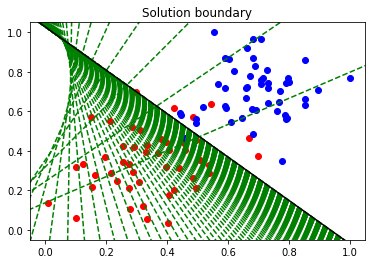

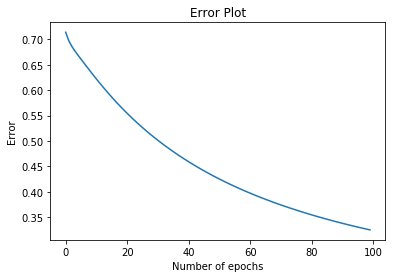

In [123]:
# Set the random seed for reproducible results
np.random.seed(32)
# Train the model using 100 epochs and learning rate of 0.01
errors = train(X, y, 100, 0.01)